In [1]:
import pandas as pd
df_og = pd.read_csv("/home/aweiland/comparing_theories/5k_mol_stats.csv")
df = df_og.dropna()

In [2]:
mean = df[["xtb_rmsd", "aimnet_rmsd", "egret_rmsd", "uma_rmsd", "r2scan-3c_rmsd", "B3LYP_rmsd", "wb97_rmsd"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]


label_map = {
    'xtb_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET-2',
    "egret_rmsd": "Egret-1",
    "uma_rmsd": "UMA",
    "r2scan-3c_rmsd": "r2scan-3c",
    "B3LYP_rmsd": "B3LYP/def2-TZVP",
    "wb97_rmsd": "wB97MV/def2-TZVP"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)




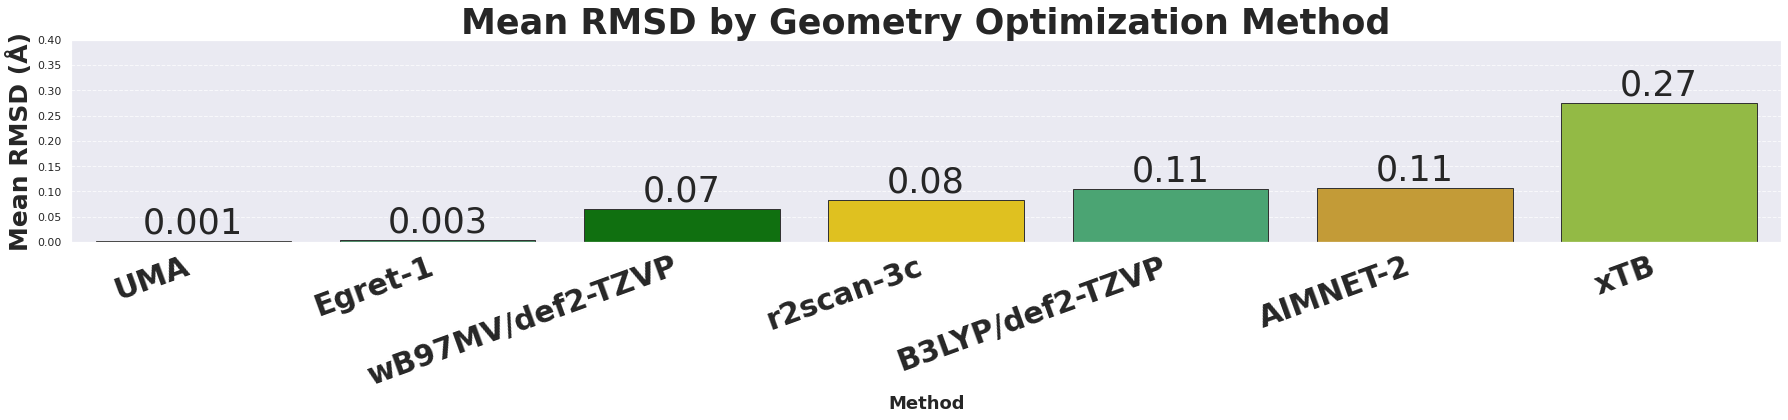

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the mean_df by mean_value
mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

# Define custom colors (ensure the list matches or exceeds number of bars)
colors = ["orange", "seagreen", "green", "gold", "mediumseagreen", "goldenrod", "yellowgreen"]

plt.figure(figsize=(25, 6))
sns.set(style="darkgrid")

# Create barplot with custom colors
ax = sns.barplot(
    data=mean_df_sorted, 
    x="theory", 
    y="mean_value", 
    palette=colors[:len(mean_df_sorted)],  # Apply custom color list
    edgecolor=".2"
)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)


# Add labels above bars
methods_with_3dp = ["UMA", "Egret-1"]  # Replace with actual names in your df

for i, (bar, method) in enumerate(zip(ax.patches, mean_df_sorted["theory"])):
    height = bar.get_height()
    label = f"{height:.3f}" if method in methods_with_3dp else f"{height:.2f}"
    
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.002,
        label,
        ha='center', va='bottom', fontsize=35
    )


# Labels and formatting
plt.xlabel("Method", fontsize=18, weight='bold')
plt.ylabel("Mean RMSD (Å)", fontsize=25, weight='bold')
plt.title("Mean RMSD by Geometry Optimization Method", fontsize=35, weight='bold')

plt.xticks(rotation=20, ha='right', fontsize=30, weight='bold')
#ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_ylim(0, 0.4)

plt.tight_layout()
plt.show()


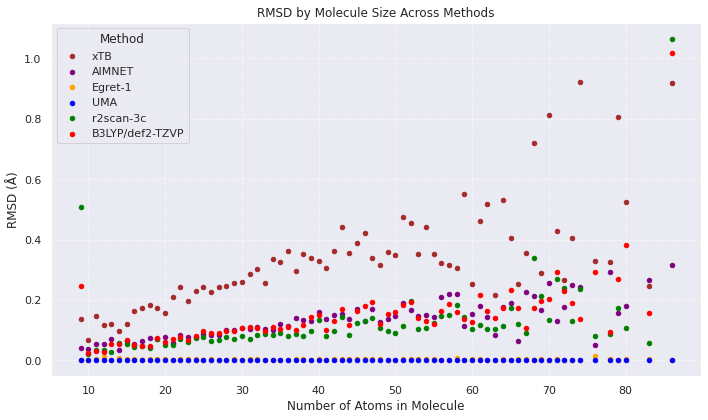

In [15]:
rmsd_columns = ["xtb_rmsd", "aimnet_rmsd", "egret_rmsd", "uma_rmsd", "r2scan-3c_rmsd", "B3LYP_rmsd"]
colors = ["brown", "purple", "orange", "blue", "green", "red"]

label_map = {
    'xtb_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET',
    "egret_rmsd": "Egret-1",
    "uma_rmsd": "UMA",
    "r2scan-3c_rmsd": "r2scan-3c",
    "B3LYP_rmsd": "B3LYP/def2-TZVP"
}

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each method
for method, color in zip(rmsd_columns, colors):
    avg_by_size = df.groupby("num_atoms")[method].mean()
    ax.scatter(avg_by_size.index, avg_by_size.values, label=label_map[method], color=color, s=20)

# Customize plot
ax.legend(title="Method")
plt.xlabel("Number of Atoms in Molecule")
plt.ylabel("RMSD (Å)")
plt.title("RMSD by Molecule Size Across Methods")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [6]:
mol_ids = [10003368, 11093, 20209115, 8411, 77235]

five_df = df[df["mol_id"].isin(mol_ids)]
five_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,mol_id,atom_index,Shift,atom_type,num_atoms,xtb_rmsd,...,xtb_runtime,egret_runtime,egret_rmsd,egret_time,uma_time,uma_rmsd,r2scan_time,r2scan-3c_rmsd,B3LYP_time,B3LYP_rmsd
95,95,95,95,95,8411,2,166.766667,6,12,0.079575,...,39.408,186.0,0.005847,186.0,0.0,0.002036,354.22,0.029140,218.35,0.034623
105,105,105,105,105,11093,0,51.800000,6,35,0.368955,...,189.146,237.0,0.001577,237.0,2.0,0.000765,1106.59,0.054939,995.19,0.113071
329,329,329,329,329,77235,0,135.800000,6,26,0.092469,...,76.084,101.0,0.001425,101.0,1.0,0.000661,587.75,0.041436,611.26,0.050236
525,525,525,525,525,10003368,0,27.900000,6,68,NaN,...,337.894,392.0,0.003037,392.0,9.0,0.001672,7907.47,0.033479,1106.47,0.041125
3933,3933,3933,3933,3933,20209115,6,65.490000,6,15,0.115782,...,80.743,468.0,0.022821,468.0,3.0,0.007375,417.76,0.052440,313.68,0.060442


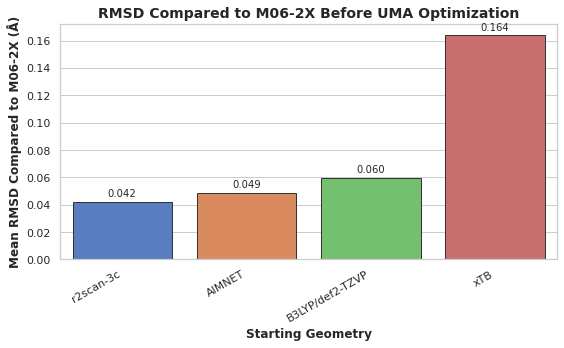

In [19]:
mean = five_df[["xtb_rmsd", "aimnet_rmsd", "r2scan-3c_rmsd", "B3LYP_rmsd"]].mean()

mean_df = mean.reset_index()
mean_df.columns = ["theory", "mean_value"]


label_map = {
    'xtb_rmsd': 'xTB',
    'aimnet_rmsd': 'AIMNET',
    "r2scan-3c_rmsd": "r2scan-3c",
    "B3LYP_rmsd": "B3LYP/def2-TZVP"
    
}
mean_df['theory'] = mean_df['theory'].map(label_map)



import seaborn as sns
import matplotlib.pyplot as plt

# Sort the mean_df by mean_value
mean_df_sorted = mean_df.sort_values("mean_value", ascending=True)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Create barplot
ax = sns.barplot(data=mean_df_sorted, x="theory", y="mean_value", palette="muted", edgecolor=".2")

# Add labels above bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,   # x position
        height + 0.002,                      # y position (slightly above bar)
        f"{height:.3f}",                     # label text, 3 decimal places
        ha='center', va='bottom', fontsize=10
    )

# Labels and formatting
plt.xlabel("Starting Geometry", fontsize=12, weight='bold')
plt.ylabel("Mean RMSD Compared to M06-2X (Å)", fontsize=12, weight='bold')
plt.title("RMSD Compared to M06-2X Before UMA Optimization", fontsize=14, weight='bold')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()
